# Custom EDA script 

This notebook takes in a clean dataframe and performs exploratory data analysis steps 
#### Mainly for continuous data 

- Assumptions
  1. There are no missing values in the df
  2. The last of the df contains the target variable 
    
#### Task performed 
1. Extract basic info of the df (df.info)
2. Basic descriptive stats (mean, median, quartiles etc.)
3. Correlation table + heatmap
4. Top features vs. target variable correlation table 
5. Box plots to observe outliers 
6. Distribution plots to check skewness 
7. (sampled) Scatter plots of all features againt the target var. 
8. Basic regression analysis with statsmodels lib. 

BEWARE: When this script is run standalone (i.e. not called into another notebook), the DF is undefined. In which case it loads a library dataset from statsmodel and uses that to show the result.  

In [2]:
# import relevent libraries 

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import statsmodels as sm
import time    # allows to pause 

from statsmodels import datasets
%matplotlib inline

In [3]:
# This script is to be inside another notebook where DF has already been defined. If not, use a builtin df for observation
try:
    DF.info() 
except:     #load a df from the builtin lib. 
    Lib_dataset = sm.datasets.macrodata.load_pandas()
    DF = Lib_dataset.data
    DF.info() 

targetVarName = DF.columns[-1]

print('***The target variable is : ' + targetVarName)  #verifying if it picked the right name

print(DF.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB
***The target variable is : realint
              year     quarter       realgdp     realcons      realinv  \
count   203.000000  203.000000    203.000000   203.000000   203.000000   
mean   1983.876847    2.492611   7221.171901 

Correlation between all variables


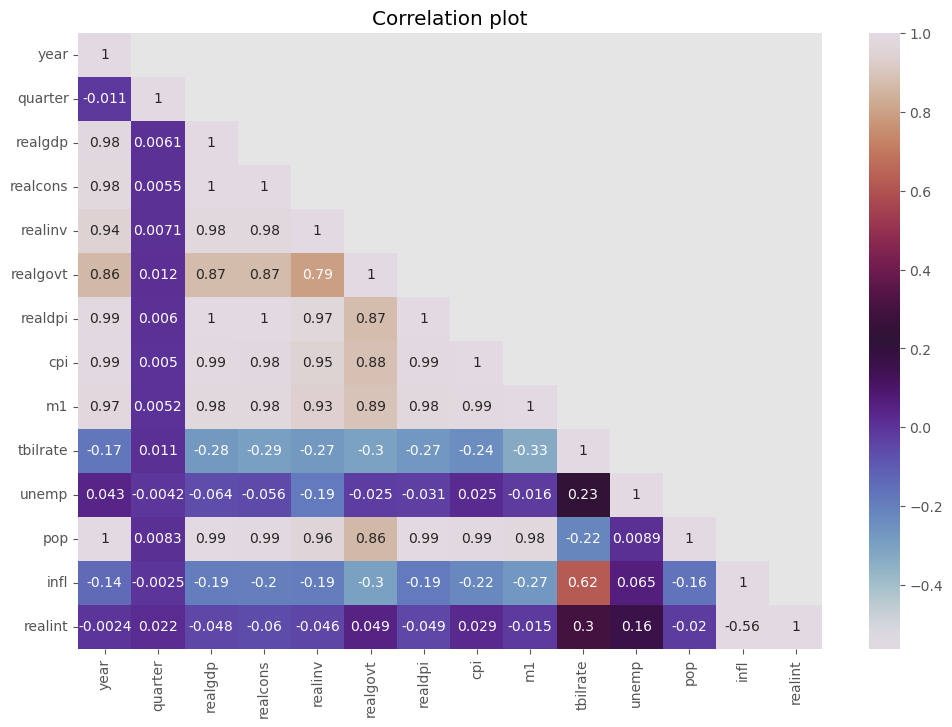

Top features correlated to Target (+ve or -ve)
+----------+------------+
|          |    realint |
|----------+------------|
| realint  |  1         |
| infl     | -0.560965  |
| tbilrate |  0.298516  |
| unemp    |  0.162489  |
| realcons | -0.0595169 |
| realgovt |  0.0492803 |
+----------+------------+


In [4]:
# see correlation between all variables in the form of heatmap + R values 

plt.figure(figsize=(12,8))
plt.style.use('ggplot')
corr_matrix = DF.corr()
corr_matrix_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape),k=0).astype(np.bool_))
heat = sns.heatmap(corr_matrix_tri, annot=True, fmt='.2g',cmap = 'twilight').set(title='Correlation plot')
print("Correlation between all variables") 
plt.show() 

## List top 5 correlated factors with the target variable 

k = 6 
cols = corr_matrix.abs().nlargest(k, targetVarName, keep = 'all')[targetVarName].index 
cm = DF[cols].corr()
print('Top features correlated to Target (+ve or -ve)' )
#print(cm[targetVarName])  

from tabulate import tabulate

x = cm[targetVarName].to_frame()    #print only first column which has corr with targt var. 

print(tabulate(x, headers='keys', tablefmt='psql'))


BOXPLOTS, EXCLUDING CATEGORICAL FEATURES


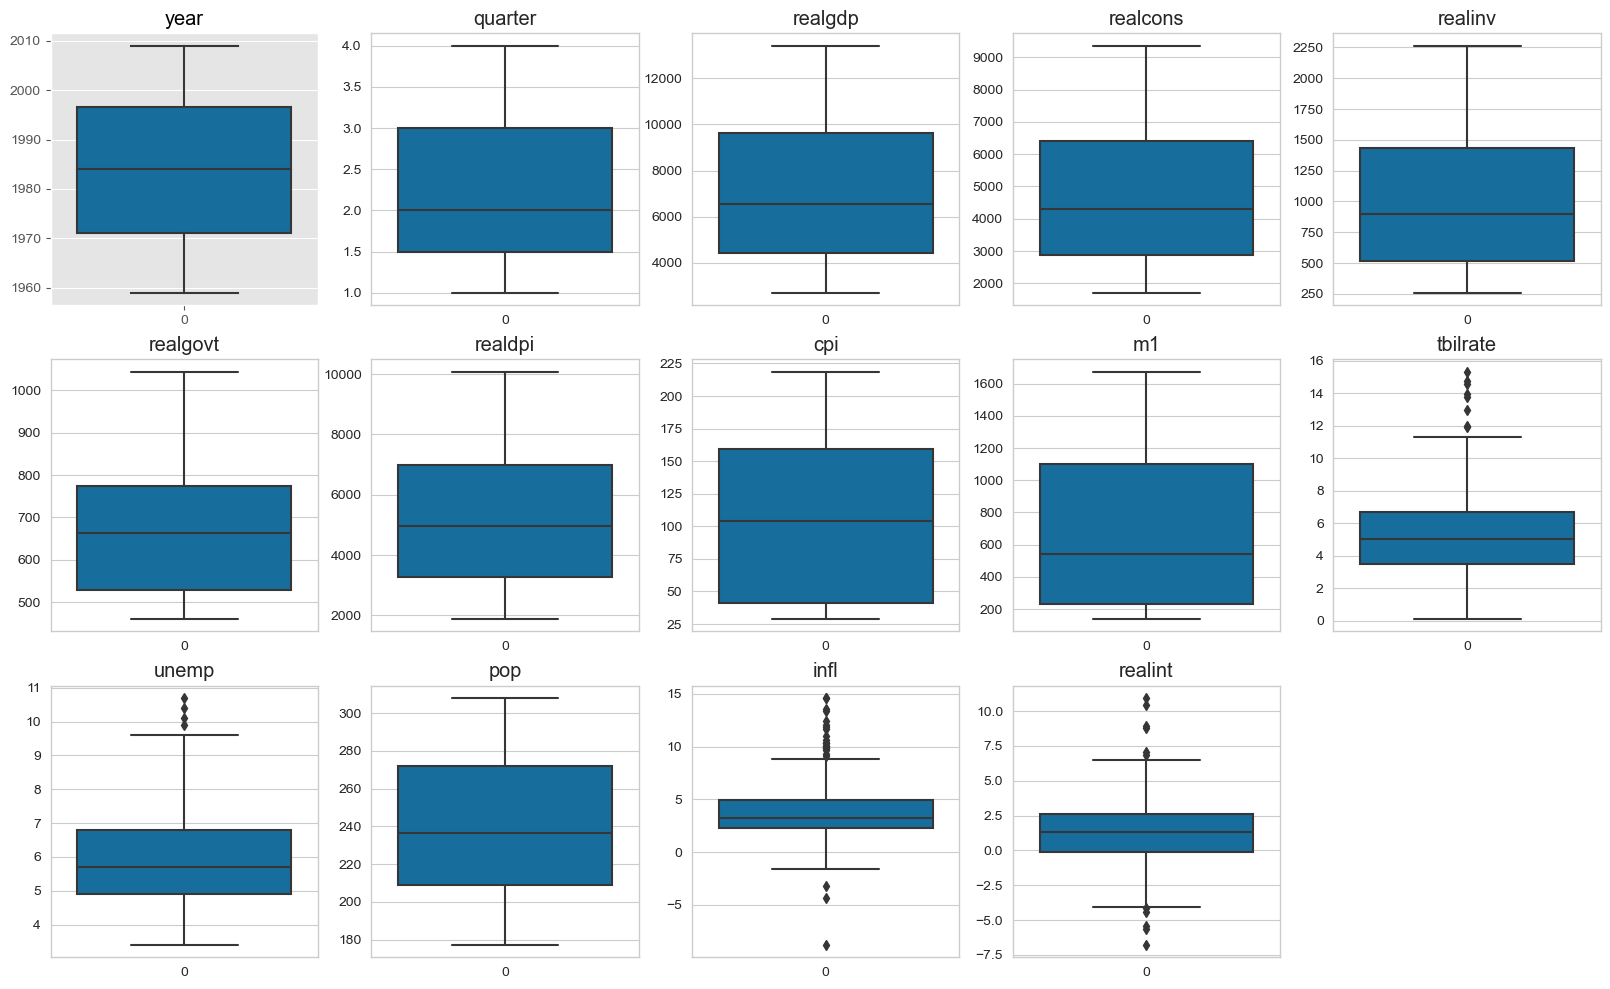

DENSITY PLOTS


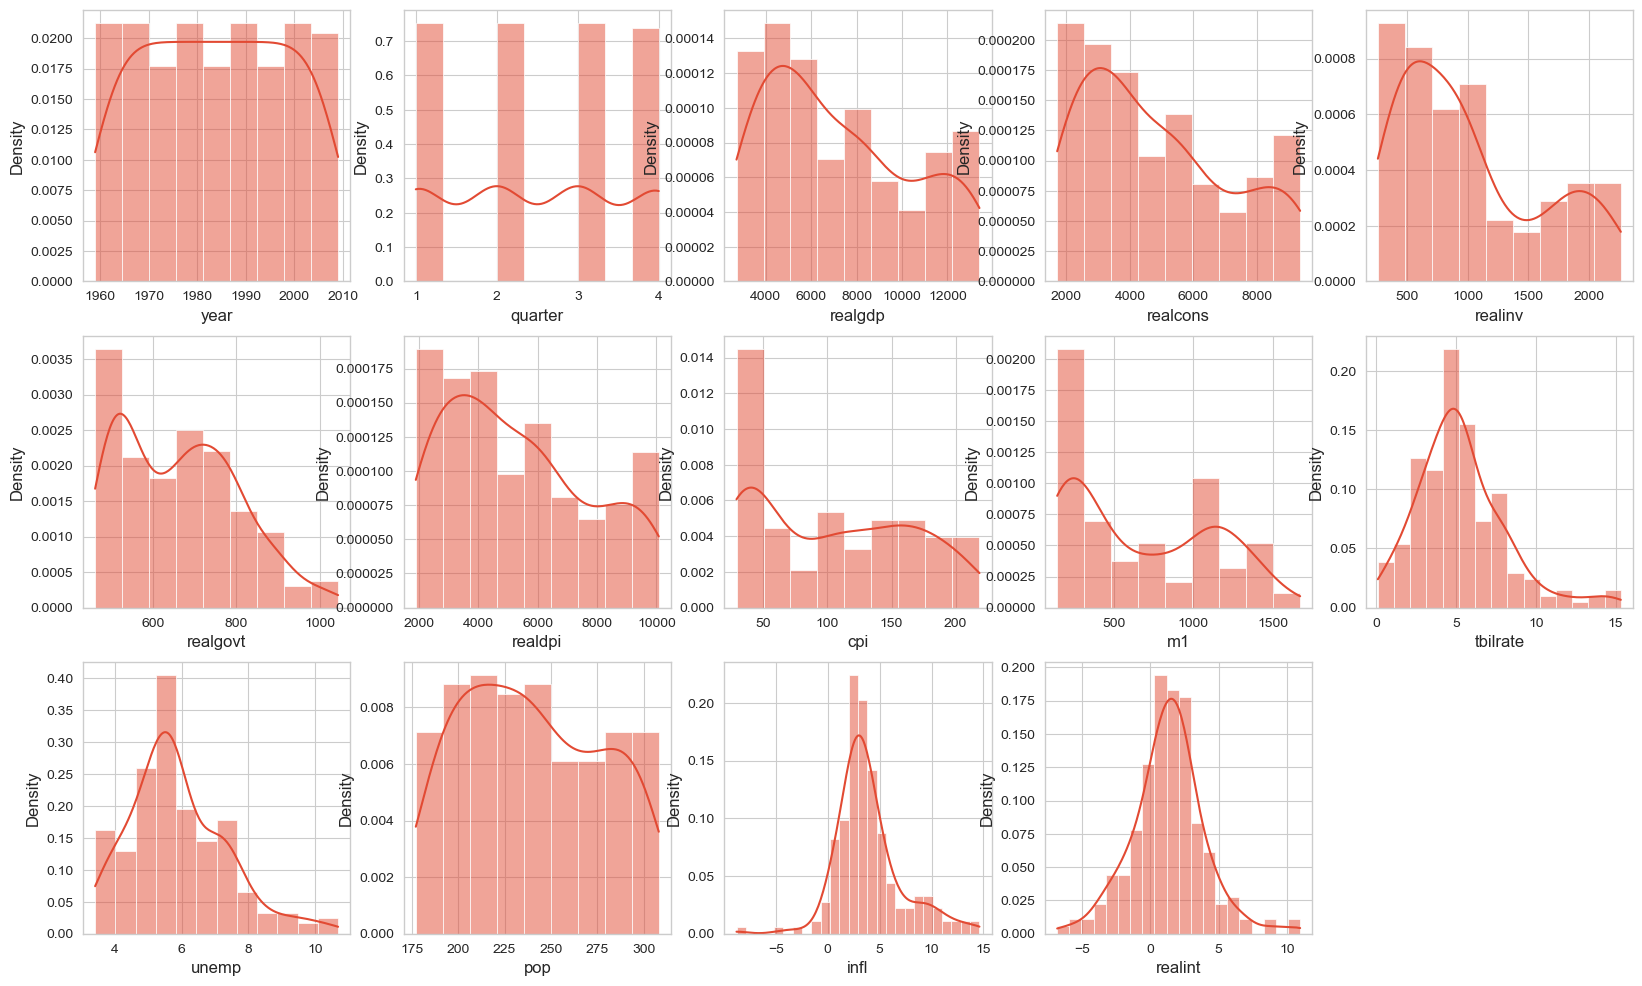

In [5]:
## Now try to spot the outliers by plotting boxplots and distributions 
import math 

dfCols = DF.columns.values
# print(dfCols)

subCol = len(dfCols)  #no of columns in the subplot figure 
#no of rows will be automatically calculated, accomodating 5 vars per row 

plt.figure(figsize=(20,12))
for i in range(0,len(dfCols)):

    if DF[dfCols[i]].dtype == 'float' or DF[dfCols[i]].dtype == 'int' or DF[dfCols[i]].dtype == 'int64':  #only for numeric data
        # print(DF[dfCols[i]].dtype)
        plt.subplot(math.ceil(subCol/5),5, i+1) 
        ax = sns.boxplot(data = DF[dfCols[i]], notch = False, palette='colorblind')
        ax.set_title(dfCols[i])

        sns.set_style('whitegrid')
print('BOXPLOTS, EXCLUDING CATEGORICAL FEATURES')
plt.show()

# Frequency distribution
plt.figure(figsize=(20,12))

for j in range(0,len(dfCols)):
    plt.subplot(math.ceil(subCol/5),5, j+1)
    ax = sns.histplot(data = DF[dfCols[j]], kde=True, stat='density') 
    # ax.set_title(dfCols[i])
    sns.set_style('whitegrid')
print('DENSITY PLOTS')
plt.show()


In [6]:
# It would be unwise to plot all data points if the size is too large. we will take a sample of the data 

sample_DF = DF.sample(frac=0.5, random_state = 10)
plt.figure(figsize=(20,12))

for i, feature in enumerate(dfCols):
    plt.subplot(math.ceil(subCol/5),5, i+1) 
    ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
print('SCATTER PLOTS')
plt.show()


C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18600\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18600\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18600\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18600\2710224785.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(data = sample_DF, x = feature, y = targetVarName, palette = 'cool')
C:\Users\Zohaib\AppData\Local\Temp\ipykernel_18600\27102

SCATTER PLOTS
